In [1]:
import warnings # current version of seaborn generates a bunch of warnings that will be ignore
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [4]:
iris.shape

(150, 6)

In [5]:
iris.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [6]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


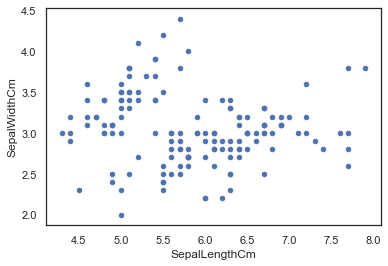

In [7]:
iris.plot(kind = 'scatter',x ='SepalLengthCm',y='SepalWidthCm')

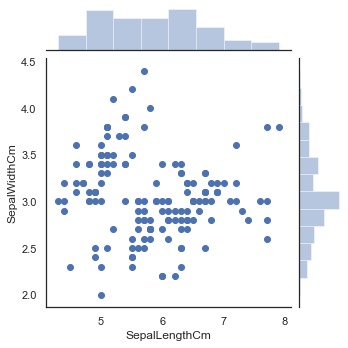

In [8]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x ='SepalLengthCm',y='SepalWidthCm',data=iris,size=5)

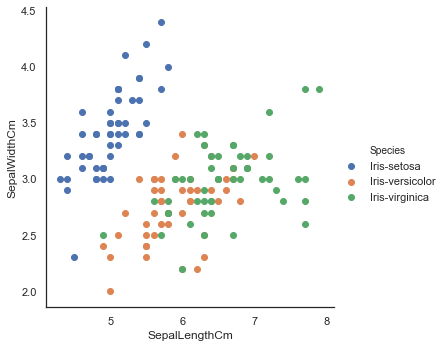

In [9]:
# use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris,hue='Species',size=5)\
.map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
.add_legend()

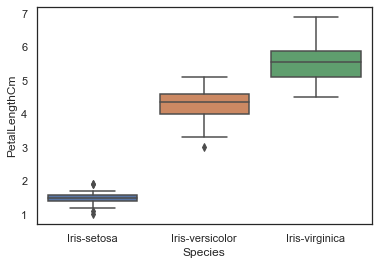

In [10]:
#Use boxplot to have a clear look at each species
sns.boxplot(data=iris,x='Species', y='PetalLengthCm')

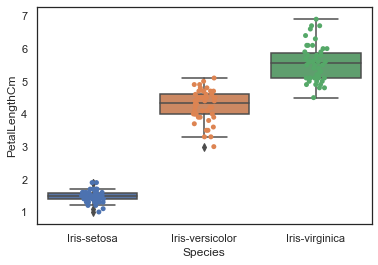

In [11]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot 
# use jitter=True so that all the points don't fall in single vertical lines
# above the species
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(data=iris,x='Species', y='PetalLengthCm')
ax = sns.stripplot(data=iris,x='Species', y='PetalLengthCm',jitter=True)

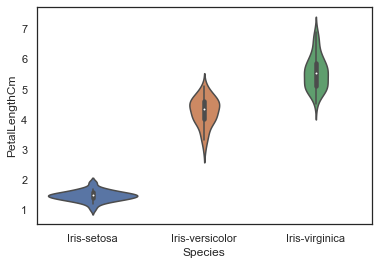

In [12]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(data=iris,x='Species', y='PetalLengthCm',size=5)

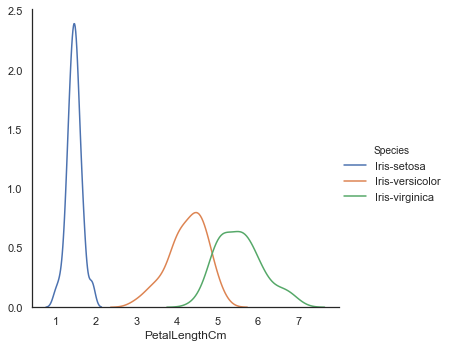

In [13]:
sns.FacetGrid(iris,hue='Species',size=5)\
.map(sns.kdeplot,'PetalLengthCm')\
.add_legend()

In [14]:
print('After removing the id column')
iris.drop('Id',axis=1)

After removing the id column


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


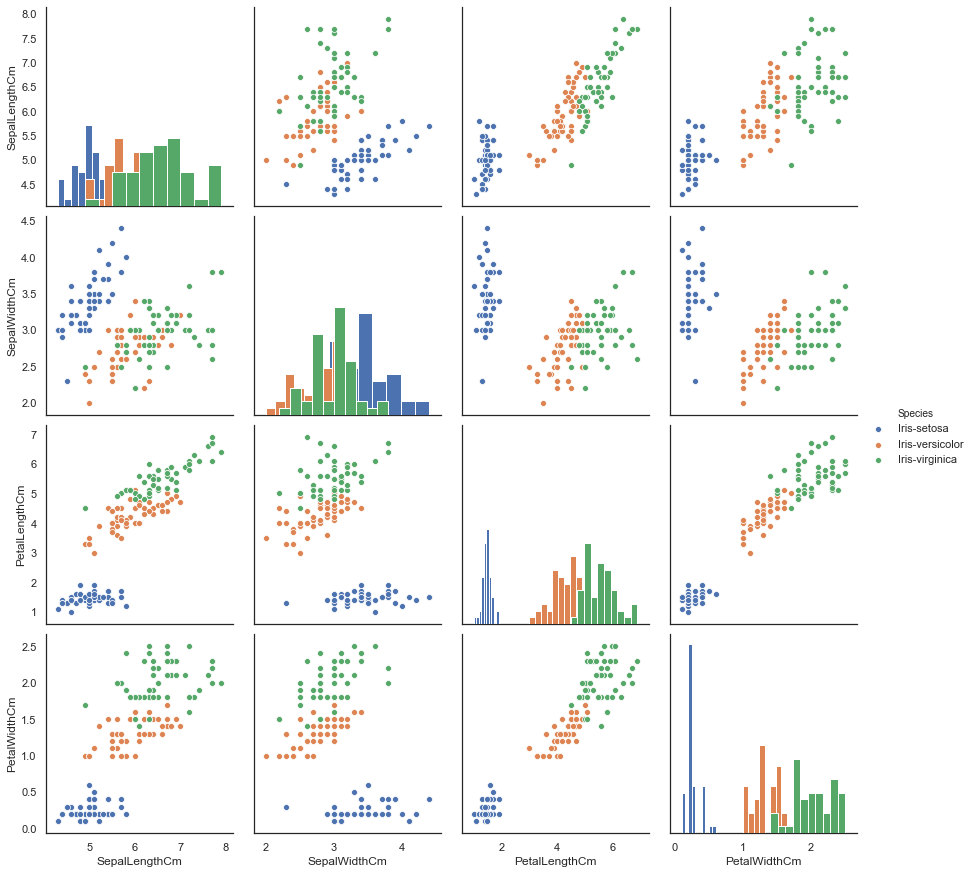

In [15]:
sns.pairplot(iris.drop('Id', axis=1), hue='Species', size=3,diag_kind='hist')

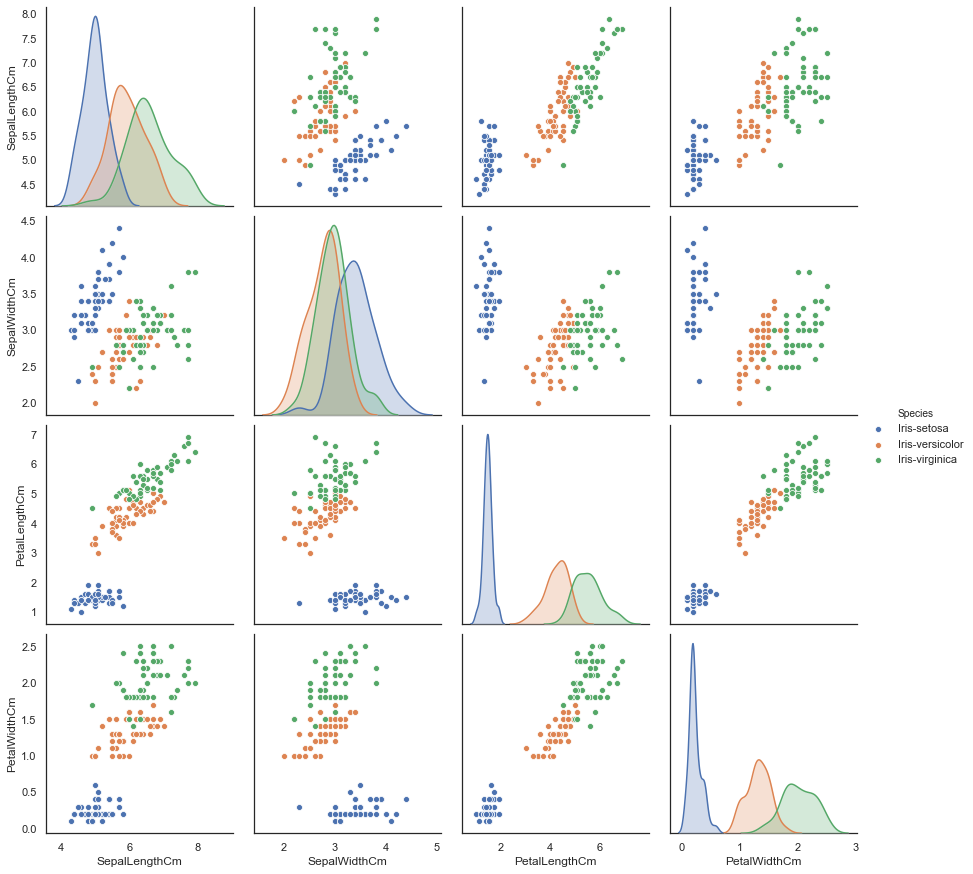

In [17]:
sns.pairplot(iris.drop('Id', axis=1), hue='Species', size=3, diag_kind='kde')

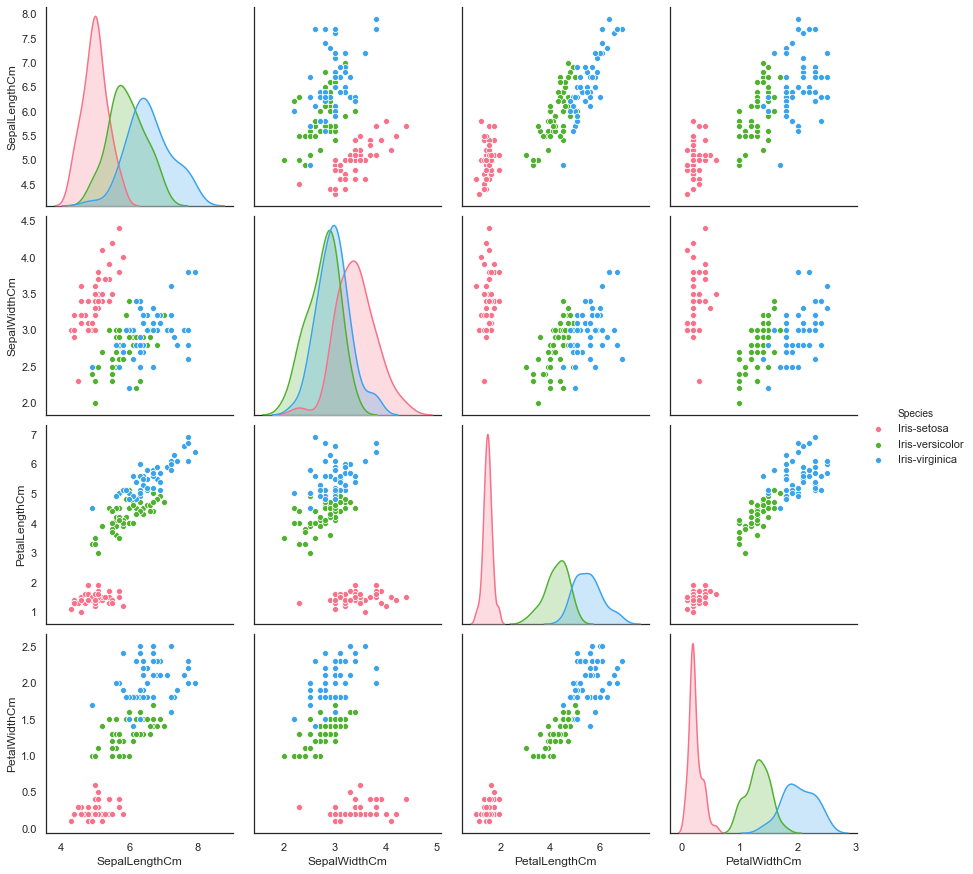

In [18]:
sns.pairplot(iris.drop('Id', axis=1), hue='Species', size=3,palette="husl")

From the above pairplots, we can see that the Iris-setosa species is separataed from the other two across all feature combinations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000258DCEF2610>,
      dtype=object)

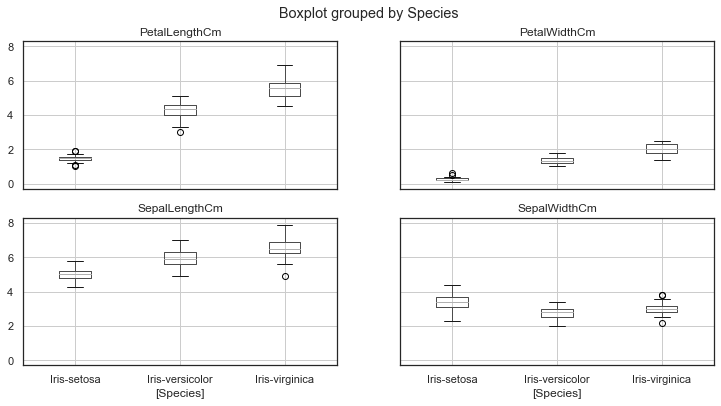

In [19]:
# make a boxplot with Pandas on each feature split out by species
iris.drop('Id',axis=1).boxplot(by='Species', figsize=(12,6))

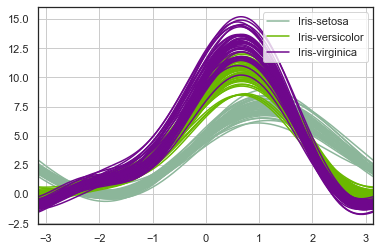

In [20]:
#pandas has a cool technique called Andrew Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.plotting import andrews_curves
andrews_curves(iris.drop('Id',axis=1),'Species')

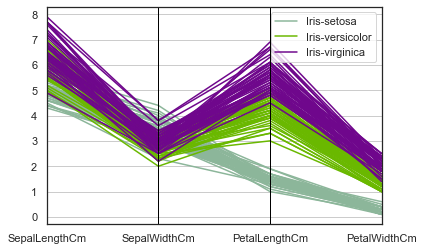

In [21]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris.drop('Id',axis=1),'Species')

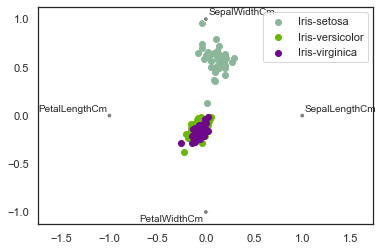

In [22]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.plotting import radviz
radviz(iris.drop('Id',axis=1),'Species')

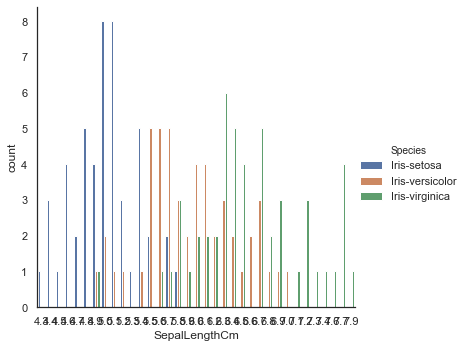

In [26]:
#A factor plot is simply the same plot generated for different response and factor variables 
sns.factorplot('SepalLengthCm', data=iris, hue='Species', kind='count' )